In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import scipy as sc
import sklearn as sk

In [130]:
df = pd.read_csv("C:/Users/Sai Ale/Downloads/capstone aly6140/bank-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [161]:
df.head(500)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,45,blue-collar,married,secondary,no,82,yes,no,unknown,6,5,250,1,-1,0,unknown,no
548,36,self-employed,married,tertiary,no,107,yes,no,unknown,6,5,146,1,-1,0,unknown,no
549,56,services,married,secondary,no,473,yes,no,unknown,6,5,416,1,-1,0,unknown,no
550,42,services,divorced,secondary,no,372,yes,yes,unknown,6,5,121,2,-1,0,unknown,no


In [132]:
df.shape

(45211, 17)

# Data Cleaning 

In [133]:
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.80].index
df.drop(missing_features, axis=1, inplace=True)
pct_null

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [134]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [135]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
df['month'] = df['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [136]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,no


In [137]:
df = df.drop_duplicates()
df.shape

(45211, 17)

In [138]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
month          3.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: object


In [139]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-139-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-139-f4e1682787c4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(28193, 17)

# Exploratory Data Analysis

C:\Users\Sai Ale\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


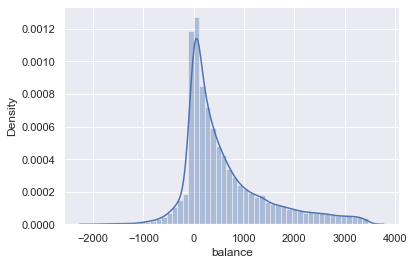

In [140]:
sns.distplot(df['balance'])
sns.set(rc={'figure.figsize':(6,4)})
#average yearly balance

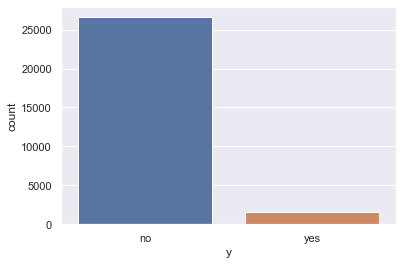

In [141]:
sns.countplot(x ='y', data = df)
plt.show()

In [142]:
df.describe()

,age,balance,day,month,duration,campaign,pdays,previous
count,28193.000000,28193.000000,28193.000000,28193.000000,28193.000000,28193.000000,28193.0,28193.0
mean,40.373639,606.670344,15.775015,6.102508,205.355833,2.189692,-1.0,0.0
std,9.884503,831.950484,8.356767,2.190616,139.320091,1.341640,0.0,0.0
min,18.000000,-1944.000000,1.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,31.000000,8.000000,5.000000,101.000000,1.000000,-1.0,0.0
50%,39.000000,317.000000,16.000000,6.000000,169.000000,2.000000,-1.0,0.0
75%,48.000000,920.000000,22.000000,7.000000,277.000000,3.000000,-1.0,0.0
max,70.000000,3462.000000,31.000000,12.000000,643.000000,6.000000,-1.0,0.0


In [143]:
df.nunique()

age            53
job            12
marital         3
education       4
default         2
balance      4006
housing         2
loan            2
contact         3
day            31
month          12
duration      643
campaign        6
pdays           1
previous        1
poutcome        1
y               2
dtype: int64

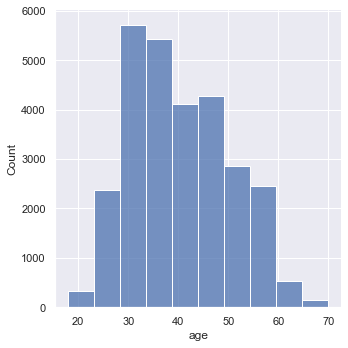

In [144]:
#No.of People holding accounts with age 
sns.displot(df['age'], bins = 10)
sns.set(rc={'figure.figsize':(6,4)})


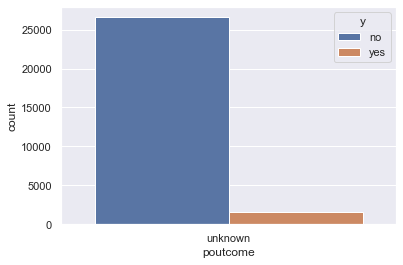

In [154]:
sns.countplot(x ='poutcome', data = df, hue = 'y')
plt.show()

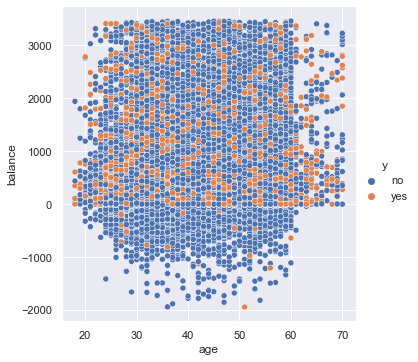

In [168]:
sns.set(rc={'figure.figsize':(6,4)})
sns.relplot(x= 'age', y = 'balance', hue = 'y', data = df)
#no of contacts performed in this campagine and their age 

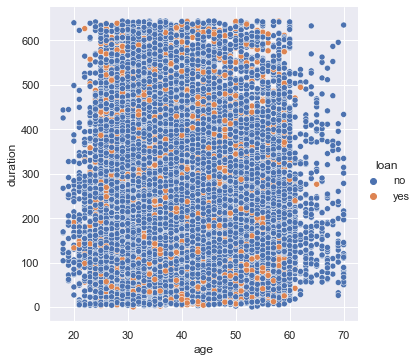

In [169]:
sns.relplot(x= 'age', y = 'duration', hue = 'loan', data = df)
#no of contacts performed in this campagine and their age and their personal loan

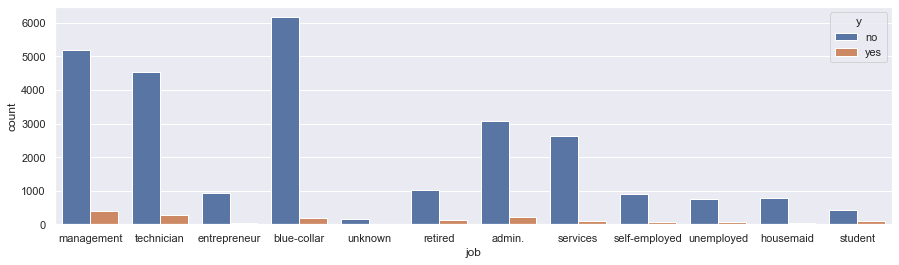

In [163]:
plt.figure(figsize=(15,4))
sns.countplot(x ='job', data = df, hue='y')
plt.show()
#no of people and their jobs

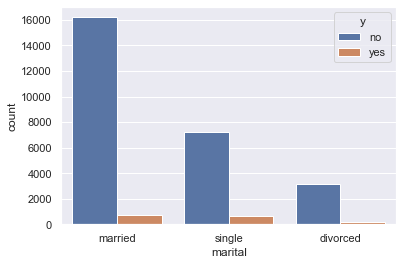

In [166]:
sns.countplot(x ='marital', data = df,hue = 'y')
plt.show()
#no of people with their marital status

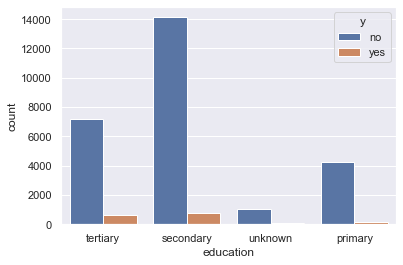

In [151]:
sns.countplot(x ='education', data = df,hue = 'y')
plt.show()
#Count of the eduction level 

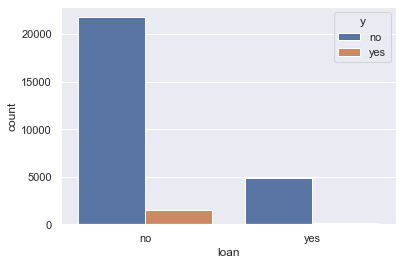

In [164]:
sns.countplot(x ='loan', data = df,hue = 'y')
plt.show()
#Personal loan with the count of people which are active and non-active

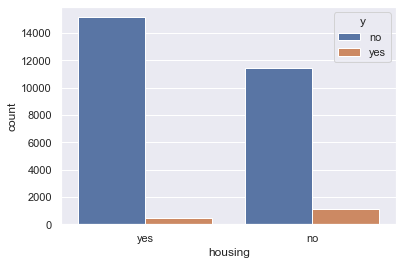

In [153]:
sns.countplot(x ='housing', data = df,hue = 'y')
plt.show()
#Housing loan with the count of people which are active and non-active

In [101]:
print(df["y"].value_counts())
#target variable "y" who are subscribed to term deposit.

no     26594
yes     1599
Name: y, dtype: int64


In [102]:
from sklearn.preprocessing import LabelEncoder
cols=['job', 'marital', 'education', 'default', 'housing', 'loan','contact','poutcome','y']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,2,5,5,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,2,5,5,76,1,-1,0,0,0
3,47,1,1,3,0,1506,1,0,2,5,5,92,1,-1,0,0,0
4,33,11,2,3,0,1,0,0,2,5,5,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,1,2,0,1428,0,0,0,16,11,333,2,-1,0,0,0
45202,34,0,2,1,0,557,0,0,0,17,11,224,1,-1,0,0,1
45203,23,8,2,2,0,113,0,0,0,17,11,266,1,-1,0,0,1
45205,25,9,2,1,0,505,0,1,0,17,11,386,2,-1,0,0,1


<AxesSubplot:>

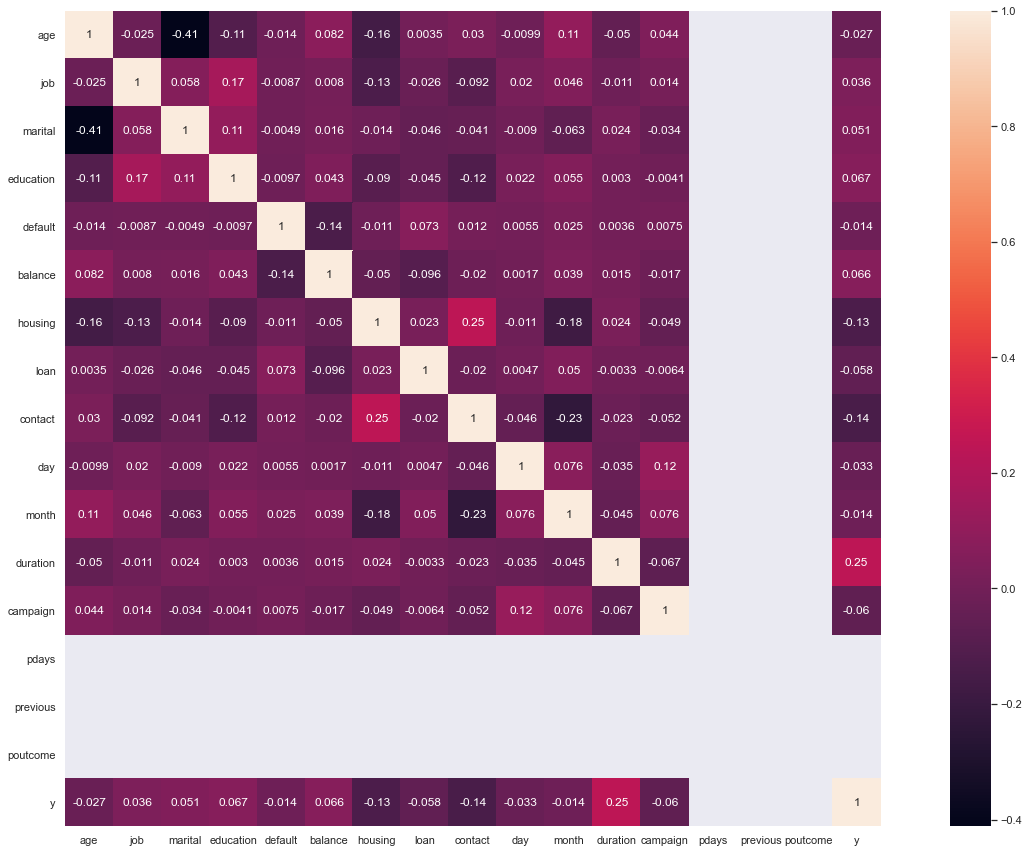

In [103]:
fig, ax = plt.subplots(figsize=(25,15))
corr = df.corr()
sns.heatmap(corr,annot=True,square=True,ax=ax)
#corelation plot with different attributes

In [104]:
X=df.drop(columns=['y'],axis=1)
y=df['y']

# Function 1 - Data Modeling and Linear Regression

In [105]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import capstone_group11 as cg
a,b=cg.ModellingandLinear(X,y)
print("Cross validation score and model score is",a,b)

Cross validation score and model score is 0.9331740115539796 0.9450257137790389


# Function 2 - Gaussian Model

In [106]:
print("Gaussian Model score is ")
cg.gnbmodel(X,y)

Gaussian Model score is 
0.9228586628834899


# Function 3 - KNN Model

In [107]:
print("Confusion Matrix and KNN model score ",cg.knn(X,y))


Confusion Matrix and KNN model score  ('[[5305    0]\n [ 334    0]]', '0.9407696400070935', '0.9407696400070935')


# Function 4 - Decision Tree

In [108]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [109]:
model = tree.DecisionTreeClassifier()

In [110]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [111]:
model.score(X_train, y_train)

1.0

In [112]:
y_pred_d = model.predict(x_test)
y_pred_d

array([0, 0, 1, ..., 0, 0, 0])

In [113]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_d)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6783709546824858

In [114]:
#confusion matrix of Decision tree
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_d))


[[5122  200]
 [ 192  125]]


<AxesSubplot:>

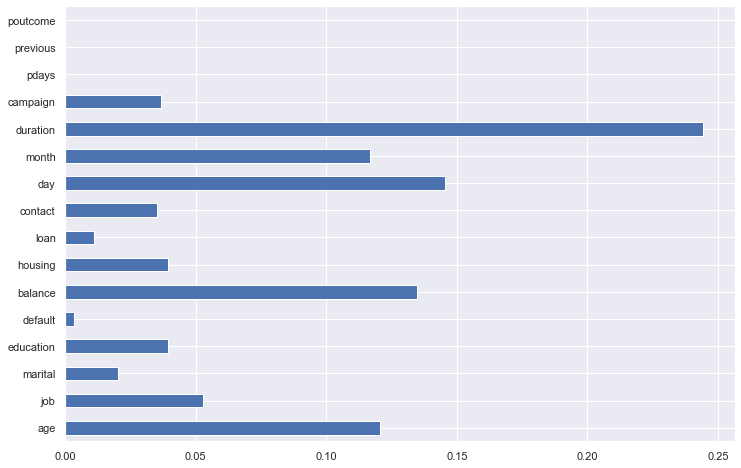

In [167]:
importances = model.feature_importances_
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))